In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.1)
import pandas as pd
import warnings
import sys
import dabest

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
PlottingFormat_Folder = '/Users/seetha/Box Sync/MultiDayData/Scripts/PlottingTools/'
sys.path.append(PlottingFormat_Folder)
import plottingfunctions as pf

In [3]:
from reliability import GetData as gd

In [4]:
DirectoryName = '/Users/seetha/Box Sync/MultiDayData/Data/'
CombinedFolderName = '/Users/seetha/Box Sync/MultiDayData/PlaceCellResultsAll/'
SaveFigureFolder = '/Users/seetha/Box Sync/MultiDayData/MultiDayPaper/Figures/FigurepanelsPDF/PV_correlation_rel/'

In [5]:
r1 = gd(FolderName=DirectoryName, CombinedDataFolder=CombinedFolderName, basetask='Task1')

Index(['Task', 'CellNumber', 'PlaceCellNumber', 'NumPlacecells', 'COM',
       'WeightedCOM', 'Precision', 'Precision_rising', 'Width', 'FiringRatio',
       'Firingintensity', 'Reliability', 'animalname'],
      dtype='object')
NR34
CFC17
NR32
CFC16
CFC18


NR34 Task5 Empty DataFrame
Columns: [Correlation_0, Correlation_1, Correlation_2, Correlation_3, Correlation_4, Correlation_5, Correlation_6, Correlation_7, Correlation_8, Correlation_9]
Index: []


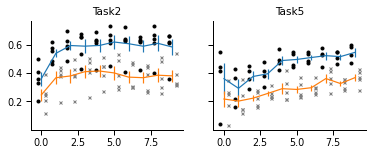

In [6]:
taskstoplot = ['Task2', 'Task5']
fs, ax =plt.subplots(1, len(taskstoplot), sharex='all', sharey='all')
r1.plot_lapwise_correlation(ax, taskstoplot=taskstoplot)

sns.despine(fs)
fs.set_size_inches((6, 2))
# fs.savefig(os.path.join(SaveFigureFolder, 'Lapwisecorrelationtrace_byreliability_Task1.pdf'), bbox_inches='tight')

In [ ]:
taskstoplot = ['Task2', 'Task5']
fs, ax =plt.subplots(1, len(taskstoplot), figsize=(10, 3), sharex='all', sharey='all')
r1.plot_regressionline(ax, taskstoplot=taskstoplot)
sns.despine(fs)
fs.set_size_inches((3, 2))
# fs.savefig(os.path.join(SaveFigureFolder, 'Correlation_byreliability_Task1.pdf'), bbox_inches='tight')

In [ ]:
df = r1.divide_by_reliability(taskstoplot)
fs, ax =plt.subplots(1, len(taskstoplot), figsize=(10, 3), sharex='all', sharey='all')
r1.plot_by_reliability(ax, df, taskstoplot)

# sns.despine(fs)
fs.set_size_inches((2, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Correlation_barplot_byreliability_Task1.pdf'), bbox_inches='tight')

In [7]:
r2 = gd(FolderName=DirectoryName, CombinedDataFolder=CombinedFolderName, basetask='Task3')

Index(['Task', 'CellNumber', 'PlaceCellNumber', 'NumPlacecells', 'COM',
       'WeightedCOM', 'Precision', 'Precision_rising', 'Width', 'FiringRatio',
       'Firingintensity', 'Reliability', 'animalname'],
      dtype='object')
NR34
CFC17
NR32
CFC16
CFC18


In [ ]:
taskstoplot = ['Task2', 'Task4']
fs, ax =plt.subplots(1, len(taskstoplot), sharex='all', sharey='all')
r2.plot_lapwise_correlation(ax, taskstoplot=taskstoplot)

sns.despine(fs)
fs.set_size_inches((6, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Lapwisecorrelationtrace_byreliability_Task3.pdf'), bbox_inches='tight')

In [ ]:
taskstoplot = ['Task2', 'Task4']
fs, ax =plt.subplots(1, len(taskstoplot), figsize=(6, 3), sharex='all', sharey='all')
r2.plot_regressionline(ax, taskstoplot=taskstoplot)

sns.despine(fs)
fs.set_size_inches((3, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Correlation_byreliability_Task3.pdf'), bbox_inches='tight')

In [ ]:
df = r2.divide_by_reliability(taskstoplot)
fs, ax =plt.subplots(1, len(taskstoplot), figsize=(6, 3), sharex='all', sharey='all')
r2.plot_by_reliability(ax, df, taskstoplot)

sns.despine(fs)
fs.set_size_inches((2, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Correlation_barplot_byreliability_Task3.pdf'), bbox_inches='tight')

## CommonCells

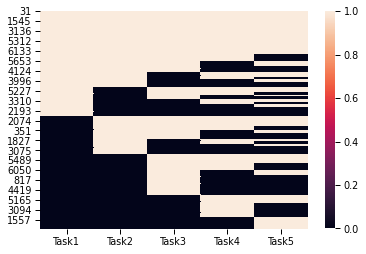

In [6]:
fs, ax = plt.subplots(1)
taskstoplot = ['Task1','Task2', 'Task3', 'Task4', 'Task5']
celldf = r1.get_cells_pertask_peranimal(taskstoplot)
PF_sort_df = celldf.sort_values(by=taskstoplot, ascending=False)
PF_sort_df = PF_sort_df[PF_sort_df[taskstoplot].sum(axis=1)>0]
g = sns.heatmap(PF_sort_df[taskstoplot])
# fs.savefig(os.path.join(SaveFigureFolder, 'Placecellfate.tiff'), bbox_inches='tight', dpi=300)

In [20]:
(PF_sort_df[['Task1', 'Task2']].sum(axis=1)==2).sum()

1174

In [21]:
(PF_sort_df[['Task1', 'Task3']].sum(axis=1)==2).sum()

1115

In [22]:
(PF_sort_df[['Task1', 'Task4']].sum(axis=1)==2).sum()

1075

In [23]:
(PF_sort_df[['Task1', 'Task5']].sum(axis=1)==2).sum()

1027

In [19]:
PF_sort_df['Task1'].sum()

1614

In [ ]:
reliability = {k:[] for k in taskstoplot+['CellNum', 'Animal']}
for a in r1.animals:
    commoncells = celldf[celldf[taskstoplot].sum(axis=1)==len(taskstoplot)]
    commoncells = commoncells[commoncells['AnimalName']==a]['CellNum']
    for c in commoncells:
        reliability['Animal'].append(a)
        reliability['CellNum'].append(c)
        for t in taskstoplot:
            rel = r1.updatedf[(r1.updatedf['CellNumber']==c) & (r1.updatedf['Task']==t)]['Reliability'].to_numpy()
            if len(rel)>1:
                reliability[t].append(np.nanmean(rel))
            elif len(rel)==0:
                reliability[t].append(np.nan)
            else:
                reliability[t].append(rel[0])
df = pd.DataFrame.from_dict(reliability)
df = df.dropna()

In [ ]:
fs, ax = plt.subplots(1)
melteddf = df.melt(id_vars=['CellNum', 'Animal'], var_name='Task', value_name='Reliability')
sns.boxplot(data=melteddf, x='Task', y='Reliability', showfliers=False, ax=ax)
for i, r in df.iterrows():
    ax.plot(np.arange(len(taskstoplot))+0.25, r[taskstoplot], 'k-', linewidth=0.2, alpha=0.5)
# ax.set_ylim((0, 1))
fs.set_size_inches((4, 2))
# fs.savefig(os.path.join(SaveFigureFolder, 'FiringRatioofcommoncells.pdf'), bbox_inches='tight', dpi=300)

In [ ]:
fs, ax = plt.subplots(1)
df['Index'] = df.index
sequential_repeated_measures = dabest.load(df, idx=('Task1', 'Task2', 'Task3', 'Task4', 'Task5'),
                                             id_col="Index", paired='sequential')
sequential_repeated_measures.mean_diff.plot(ax=ax, float_contrast=False, es_marker_size=5);
# fs.set_size_inches((4, 3))
fs.savefig(os.path.join(SaveFigureFolder, 'Reliabilityofcommoncellsdabest.pdf'), bbox_inches='tight', dpi=300)

In [ ]:
from scipy import stats
import statsmodels.stats.multicomp as mc

comp1 = mc.MultiComparison(melteddf['Reliability'], melteddf['Task'])
tbl, a1, a2 = comp1.allpairtest(stats.ks_2samp, method= "bonf")
tbl

In [ ]:
taskstoplot = ['Task2', 'Task3', 'Task4', 'Task5']
fs, ax =plt.subplots(1, len(taskstoplot), figsize=(10, 3), sharex='all', sharey='all')
commoncells = celldf[celldf[taskstoplot].sum(axis=1)==len(taskstoplot)]
print(len(commoncells))
r1.plot_regressionline(ax, taskstoplot=taskstoplot, commoncells=True, celldata=commoncells)

## Reliability of only cells with one place field

In [ ]:
taskstoplot = ['Task1','Task2', 'Task3', 'Task4', 'Task5']
celldf = r1.get_cells_pertask_peranimal(taskstoplot)

In [ ]:
reliability = {k:[] for k in taskstoplot+['CellNum', 'Animal']}
for a in r1.animals:
    commoncells = celldf[celldf[taskstoplot].sum(axis=1)==len(taskstoplot)]
    commoncells = commoncells[commoncells['AnimalName']==a]['CellNum']
    for c in commoncells:
        thisdf = r1.updatedf[(r1.updatedf['CellNumber']==c) & (r1.updatedf['animalname']==a)]
        if np.any(thisdf['NumPlacecells']>1):
            continue 
        reliability['Animal'].append(a)
        reliability['CellNum'].append(c)
        for t in taskstoplot:
            rel =  thisdf[(thisdf['Task']==t)]['FiringRatio'].to_numpy()
#             print(len(rel))
            if len(rel)==0:
                reliability[t].append(np.nan)
            else:
                reliability[t].append(rel[0])
df = pd.DataFrame.from_dict(reliability)
df = df.dropna()
# df = df.loc[~np.any(df[taskstoplot]>=0.5, axis=1)]
# df = df.loc[~df.index.isin(largedf.index)]
# largedf

In [ ]:
fs, ax = plt.subplots(1)
melteddf = df.melt(id_vars=['CellNum', 'Animal'], var_name='Task', value_name='FiringRatio')
sns.boxplot(data=melteddf, x='Task', y='FiringRatio', showfliers=False, ax=ax)
for i, r in df.iterrows():
    ax.plot(np.arange(len(taskstoplot))+0.25, r[taskstoplot], 'k-', linewidth=0.2, alpha=0.5)
# ax.set_ylim((0, 0.5))
fs.set_size_inches((4, 2))
# fs.savefig(os.path.join(SaveFigureFolder, 'FiringRatioofcommoncells_singleplacecell.pdf'), bbox_inches='tight', dpi=300)

In [ ]:
fs, ax = plt.subplots(1)
df['Index'] = df.index
sequential_repeated_measures = dabest.load(df, idx=('Task1', 'Task2', 'Task3', 'Task4', 'Task5'),
                                             id_col="Index", paired='sequential')
sequential_repeated_measures.mean_diff.plot(ax=ax, float_contrast=False, es_marker_size=5);
fs.set_size_inches((4, 4))
# fs.savefig(os.path.join(SaveFigureFolder, 'FiringRatioofcommoncellsdabest_singleplacecell.pdf'), bbox_inches='tight', dpi=300)

In [ ]:
from scipy import stats
import statsmodels.stats.multicomp as mc

comp1 = mc.MultiComparison(melteddf['FiringRatio'], melteddf['Task'])
tbl, a1, a2 = comp1.allpairtest(stats.ks_2samp, method= "bonf")
tbl

## Relaibility across days heatmap

In [ ]:
reliability_df = df.copy()

In [ ]:
highr_df = reliability_df.loc[np.all(reliability_df[taskstoplot]>0.5, axis=1)]

## How many cells are highly reliable throughout

In [ ]:
reliability_df = df.copy()

In [ ]:
correlation = {k:[] for k in ['Task', 'Correlation', 'Reliability', 'CellNum', 'Animal']}
for a in r1.animals:
    highr_df = reliability_df.loc[np.all(reliability_df[taskstoplot]>0.5, axis=1)]
    cells = highr_df[highr_df['Animal']==a]['CellNum']
    for c in cells:
        thisdf = r1.updatedf[(r1.updatedf['CellNumber']==c) & (r1.updatedf['animalname']==a)]
        for t in taskstoplot:
            correlation['Animal'].append(a)
            correlation['CellNum'].append(c)
            correlation['Task'].append(t)
            correlation['Reliability'].append(thisdf[(thisdf['Task']==t)]['Reliability'].to_numpy()[0])
            correlation['Correlation'].append(thisdf[(thisdf['Task']==t)]['Correlation'].to_numpy()[0])
correlationdf = pd.DataFrame.from_dict(correlation)
correlationdf = correlationdf.dropna()
correlationdf['Type'] = 'Highreliability'

## Number of reliable cells by task

In [20]:
taskstoplot = ['Task1','Task2', 'Task3', 'Task4', 'Task5']

In [21]:
num_df = pd.DataFrame()
for a in r1.animals:
    thisdf = r1.updatedf[r1.updatedf['animalname']==a][['Task', 'Reliability']]
    relcount = thisdf[thisdf['Reliability']>0.6].groupby('Task').count().reset_index()
    relcount['Total'] = thisdf.groupby('Task').count().reset_index().rename(columns={'Reliability':'Total'})['Total']
    relcount['Animal'] = a
    num_df = pd.concat((num_df, relcount))

In [27]:
num_df['Perc'] = num_df['Reliability']/num_df['Total']*100

In [23]:
pivotdf = num_df.pivot(columns=['Task'], values=['Perc'], index=['Animal']).fillna(0)

In [24]:
pivotdf

Perc                                            
Task        Task1      Task2      Task3      Task4      Task5
Animal                                                       
CFC16    4.201681   7.500000   0.573614   1.050420  17.713004
CFC17   41.544118  35.661765  19.230769  19.692308  40.070922
CFC18   21.442886  26.642984   6.340058   5.730659  18.775510
NR32    26.775956  26.666667   2.952030   9.629630  25.853659
NR34    21.917808  35.588235   3.786575   6.626506   0.000000

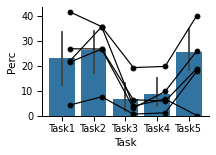

In [25]:
fs, ax = plt.subplots(1)
sns.barplot(x='Task', y='Perc', data=num_df)
for i, r in pivotdf.iterrows():
    ax.plot(np.arange(len(taskstoplot))+0.25, r, 'k', marker='o')
sns.despine(ax=ax)
fs.set_size_inches((3, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'percentageofreliablecells_point6.pdf'), bbox_inches='tight', dpi=300)